#  PanSTARRS - WISE cross-match: Compute the $Q_0$

In [1]:
import numpy as np
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky

In [2]:
from mltier1 import generate_random_catalogue, Field, Q_0

In [3]:
%load_ext autoreload

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
field = Field(170.0, 190.0, 45.5, 56.5)

## Load the data

### Load the catalogues

In [6]:
panstarrs_full = Table.read("panstarrs_u2.fits")

In [7]:
wise_full = Table.read("wise_u2.fits")

### Restrict the study to the well sampled area

In [8]:
panstarrs = field.filter_catalogue(
    panstarrs_full, 
    colnames=("raMean", "decMean"))

In [9]:
# Free memory
del panstarrs_full

In [10]:
wise = field.filter_catalogue(
    wise_full, 
    colnames=("raWise", "decWise"))

In [11]:
# Free memory
del wise_full

### Coordinates

As we will use the coordinates to make a cross-match we to load them

In [12]:
coords_panstarrs = SkyCoord(panstarrs['raMean'], panstarrs['decMean'], unit=(u.deg, u.deg), frame='icrs')

In [13]:
coords_wise = SkyCoord(wise['raWise'], wise['decWise'], unit=(u.deg, u.deg), frame='icrs')

### Cross-match and random cross-match

We create an instance of Q_0 using as the input the two catalogues and the area. It will compute the $Q_0$ for different radius.

The following function is not used but shows the internal code use for the computing of the $Q_0$.

In [14]:
# Example function (not used, we use a class that contains this code)
def q_0_r(coords_wise, coords_panstarrs, field, radius=5):
    """Compute the Q_0 for a given radius"""
    random_wise = field.random_catalogue(len(coords_wise))
    
    idx_random_wise, idx_panstarrs, d2d, d3d = search_around_sky(
        random_wise, coords_panstarrs, radius*u.arcsec)
    
    nomatch_random = len(coords_wise) - len(np.unique(idx_random_wise))
    
    idx_wise, idx_panstarrs, d2d, d3d = search_around_sky(
        coords_wise, coords_panstarrs, radius*u.arcsec)
    
    nomatch_wise = len(coords_wise) - len(np.unique(idx_wise))
                                          
    return (1. - float(nomatch_wise)/float(nomatch_random))

In [15]:
q_0_comp = Q_0(coords_wise, coords_panstarrs, field)

In [16]:
q_0_comp(radius=5)

0.629392983348576

## $Q_0$ dependence on the radius

We will iterate 10 times for each radius. However, the error is so small that a direct computation can be accurate to 4 significant figures.

In [17]:
n_iter = 10

The radius tested ranges from 1 to 25

In [18]:
rads = list(range(1,26))

In [19]:
q_0_rad = []
for radius in rads:
    q_0_rad_aux = []
    for i in range(n_iter):
        out = q_0_comp(radius=radius)
        q_0_rad_aux.append(out)
    q_0_rad.append(np.mean(q_0_rad_aux))
    print("{:2d} {:7.5f} +/- {:7.5f} [{:7.5f} {:7.5f}]".format(radius, 
            np.mean(q_0_rad_aux), np.std(q_0_rad_aux), 
            np.min(q_0_rad_aux), np.max(q_0_rad_aux)))

 1 0.51223 +/- 0.00002 [0.51220 0.51226]
 2 0.60789 +/- 0.00004 [0.60783 0.60795]
 3 0.63058 +/- 0.00004 [0.63050 0.63063]
 4 0.63359 +/- 0.00006 [0.63350 0.63368]
 5 0.62944 +/- 0.00012 [0.62920 0.62962]
 6 0.62105 +/- 0.00012 [0.62086 0.62123]
 7 0.61010 +/- 0.00011 [0.60994 0.61036]
 8 0.59739 +/- 0.00014 [0.59709 0.59756]
 9 0.58558 +/- 0.00027 [0.58532 0.58608]
10 0.57676 +/- 0.00011 [0.57657 0.57691]
11 0.57078 +/- 0.00027 [0.57038 0.57132]
12 0.56704 +/- 0.00017 [0.56661 0.56728]
13 0.56498 +/- 0.00046 [0.56393 0.56564]
14 0.56440 +/- 0.00053 [0.56357 0.56518]
15 0.56420 +/- 0.00052 [0.56345 0.56501]
16 0.56449 +/- 0.00052 [0.56374 0.56525]
17 0.56498 +/- 0.00063 [0.56407 0.56621]
18 0.56534 +/- 0.00058 [0.56443 0.56628]
19 0.56610 +/- 0.00041 [0.56539 0.56684]
20 0.56615 +/- 0.00055 [0.56536 0.56738]
21 0.56695 +/- 0.00071 [0.56604 0.56807]
22 0.56742 +/- 0.00069 [0.56615 0.56908]
23 0.56797 +/- 0.00143 [0.56518 0.56984]
24 0.56760 +/- 0.00140 [0.56549 0.57007]
25 0.56979 +/- 0

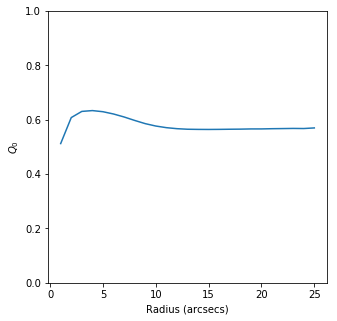

In [20]:
plt.rcParams["figure.figsize"] = (5,5)
plot(rads, q_0_rad)
xlabel("Radius (arcsecs)")
ylabel("$Q_0$")
ylim([0, 1]);